<p style="background-color:cornflowerblue;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>Boosting Methods - Titanic Project</b></p>

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1200/1*qTqs-DD_i5dqUtTuaVzfWw.png" width="800" height="400"/>
</div>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#eda">Understanding Data & EDA</a></li>
<li><a href="#data-prep">Data Preparation</a></li>
<li><a href="#modeling">Modeling & Models' Performances</a></li>
<li><a href="#compare-models">Comparing The Models</a></li>
<li><a href="#final-model">Final Model & Prediction</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

# <font color='cornflowerblue'> <b>Introduction</b><font color='black'>

In this project, the Titanic disaster dataset was used to predict survival rates. The dataset was provided by Kaggle and includes socio-economic information about the passengers (e.g., age, gender, class). Various machine learning algorithms were evaluated, and performance metrics were compared during the modeling process. Data analysis and feature engineering techniques were applied to enhance the accuracy of the models.

<a id='import-library'></a>
# <font color='cornflowerblue'> <b>Importing Libraries</b><font color='black'>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

<a id='loading-dataset'></a>
# <font color='cornflowerblue'> <b>Loading The Dataset</b><font color='black'>

In [8]:
# Loading the training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

# Store our passenger ID for easy access
test_ids = test_df['PassengerId']

In [9]:
# Displaying the first 5 observations of the training set
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Displaying the first 5 observations of the test set
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id='eda'></a>
# <font color='cornflowerblue'> <b>Understanding Data & EDA</b><font color='black'>

In [12]:
print("-----------------Train Data Shape----------------")
print()
print(train_df.shape)
print()
print("------------------Test Data Shape-----------------")
print()
print(test_df.shape)

-----------------Train Data Shape----------------

(891, 12)

------------------Test Data Shape-----------------

(418, 11)


In [13]:
# Overview of the datasets
print("-----------------Train Data Info----------------")
print()
train_df.info()
print()
print("------------------Test Data Info-----------------")
print()
test_df.info()

-----------------Train Data Info----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

------------------Test Data Info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dty

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [15]:
train_df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [16]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [17]:
test_df.describe(include="object").T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [18]:
skim(train_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 891    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ PassengerId    │    0 │       0 │      446 │    257.4 │     1 │  223.5 │    446 │  668.5 │    891 │ ▇▇▇▇▇▇ │  │
│ │ Survived       │    0 │       0 │   0.3838 │   0.4866 │     0 │      0 │      0 │      1 │      1 │ ▇    ▅ │  │
│ │ Pclass         │    0 │       0 │    2.309 │   0.8361 │     1 │      2 │      3 │      3 │      3 │ ▃  ▃ ▇ │  │
│ │ Age            │  177 │   19.87 │     29.7 │    14.53 │  0.42 │  20.12 │     28 │     38 │     80 │ ▂▇▇▃▁  │  │
│ │ SibSp          │    0 │       0 │    0.523 │    1.103 │     0 │      0 │      0 │      1 │      8 │   ▇    │  │
│ │ Parch          │    0 │       0 │   0.3816 │   0.8061 │     0 │      0 │      0 │      0 │      6 │  ▇▁▁   │  │
│ │ Fare           │    0 │       0 │     32.2 │    49.69 │     0 │   7.91 │  14.45 │     31 │  512.3 │   ▇    │  │
│ └────────────────┴──────┴─────────┴──────────┴──────────┴───────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                     │        0 │          0 │                          4.1 │                     3626 │  │
│ │ Sex                      │        0 │          0 │                            1 │                      891 │  │
│ │ Ticket                   │        0 │          0 │                          1.3 │                     1130 │  │
│ │ Cabin                    │      687 │       77.1 │                         0.27 │                      238 │  │
│ │ Embarked                 │        2 │       0.22 │                            1 │                      889 │  │
│ └──────────────────────────┴──────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [19]:
# Missing values control
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
train_df.drop(columns="PassengerId", inplace=True)
test_df.drop(columns="PassengerId", inplace=True)

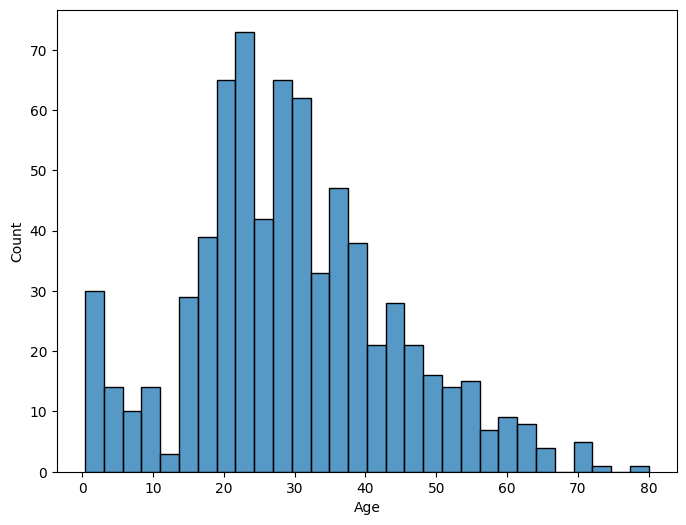

In [22]:
sns.histplot(data=train_df, x='Age', kde=False, bins=30);

In [23]:
train_df.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

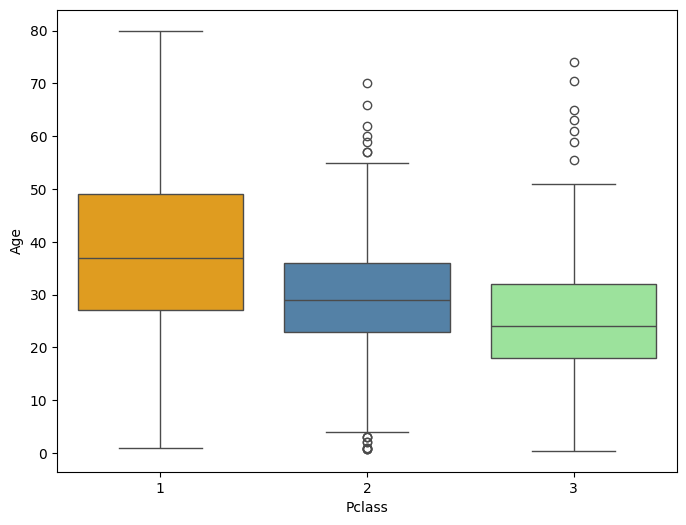

In [24]:
sns.boxplot(data=train_df, 
            x='Pclass', 
            y='Age',
            palette=["orange", "steelblue", "lightgreen"]
           );

In [25]:
# If we determine whether female passengers are 'miss' or 'mrs', we can make a better estimate of their ages.
train_df['Name']=train_df['Name'].apply(lambda x: 'Miss' if 'Miss.' in x else ('Mrs' if 'Mrs.' in x else 'Mr'))
test_df['Name']=test_df['Name'].apply(lambda x: 'Miss' if 'Miss.' in x else ('Mrs' if 'Mrs.' in x else 'Mr'))

In [26]:
train_df.loc[train_df['Name']=='Miss']['Age'].mean()

21.773972602739725

In [27]:
train_df.loc[train_df['Name']=='Mrs']['Age'].mean()

35.898148148148145

In [28]:
train_df.loc[train_df['Name']=='Mr']['Age'].mean()

30.759065217391303

In [29]:
def filling(data):
    a=['Miss', 'Mrs', 'Mr']
    b =[22, 36, 31]
    for i, k in zip(a,b):
        data.loc[data['Name']==i, 'Age'] = data.loc[data['Name']==i]['Age'].fillna(k)
    return data
        
filling(train_df)
filling(test_df)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,31.0,0,0,A.5. 3236,8.0500,NaN,S
414,1,Mr,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,Mr,male,31.0,0,0,359309,8.0500,NaN,S


In [30]:
train_df.drop(columns="Cabin", inplace=True)
test_df.drop(columns="Cabin", inplace=True)

In [31]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [32]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [33]:
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [34]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [35]:
train_df.isnull().sum().sum()

0

In [36]:
test_df.isnull().sum().sum()

0

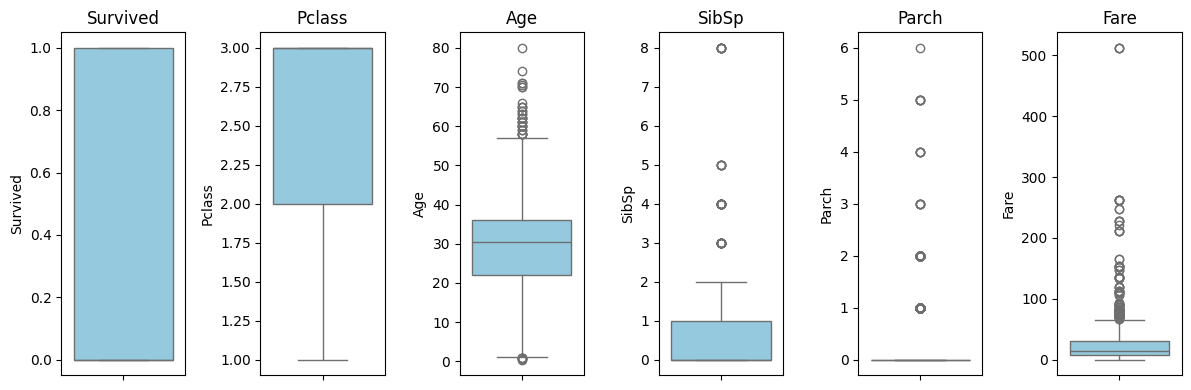

In [37]:
# Checking Outliers in Individual Features
x = 0

#Numerical features;  
numeric_columns = train_df.select_dtypes(include=['number']).columns
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=train_df[col], color='skyblue')
    plt.title(col)

plt.tight_layout() 
plt.show()

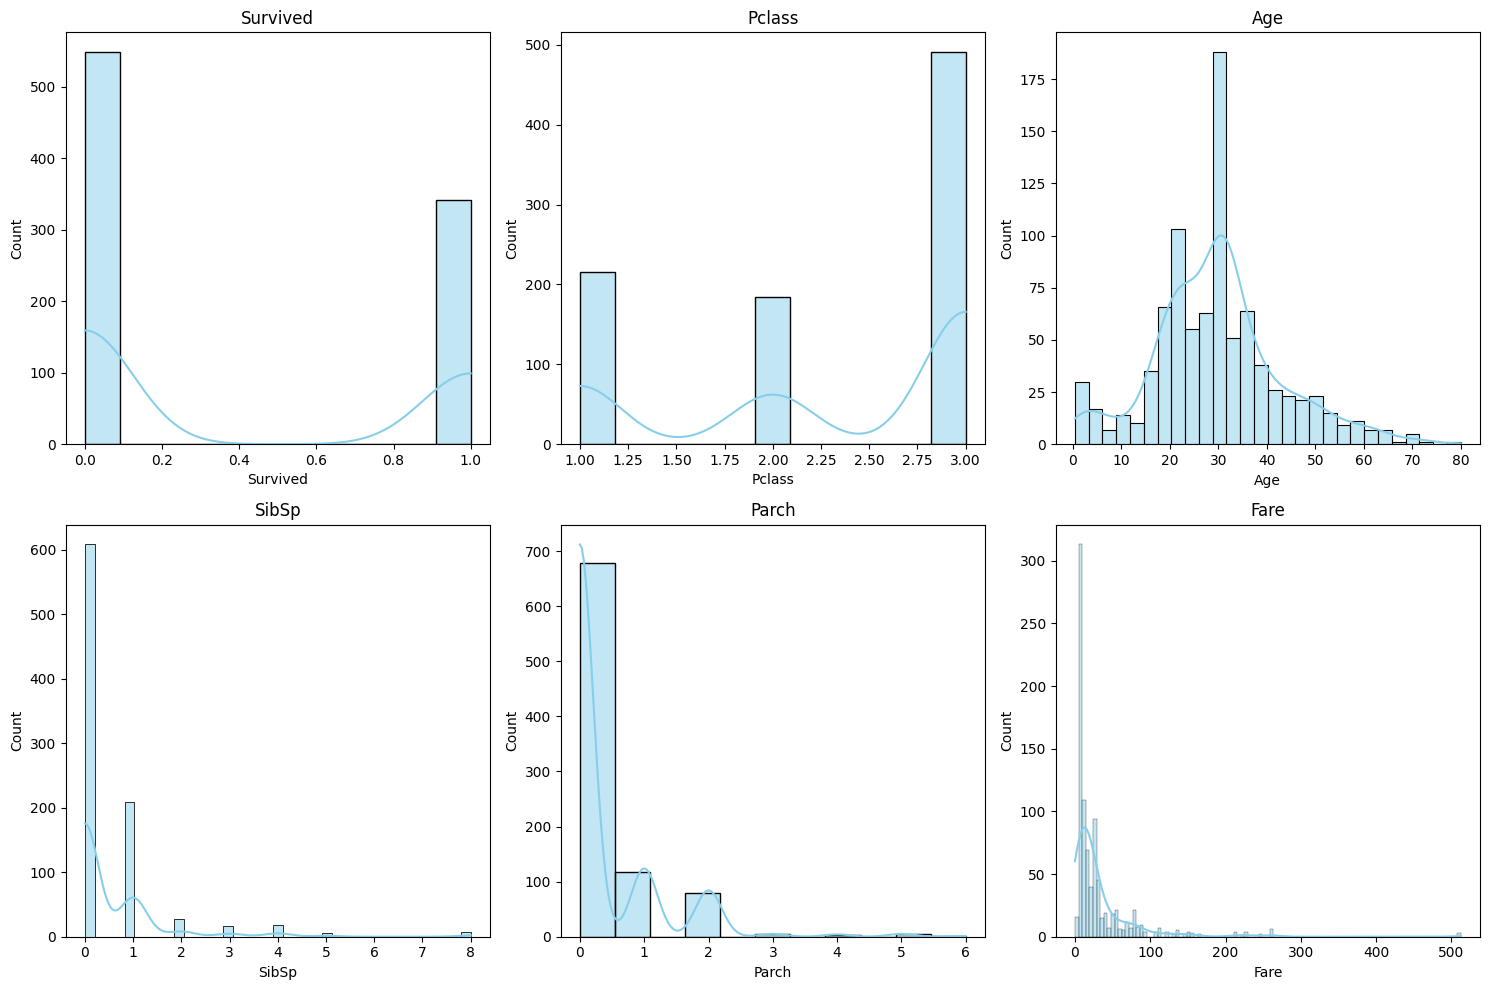

In [38]:
columns = numeric_columns
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(train_df[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [39]:
train_df.drop(columns=["Name", "Ticket"], inplace=True)
test_df.drop(columns=["Name", "Ticket"], inplace=True)

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


<a id='data-prep'></a>
# <font color='cornflowerblue'> <b>Data Preparation</b><font color='black'>

## <font color='slateblue'> <b>Encoding</b><font color='black'>

In [85]:
cols=['Sex', 'Embarked']
enc1=OrdinalEncoder(categories=[['female', 'male']])
enc2=OrdinalEncoder(categories=[['S','C','Q','U']])
enc = [enc1, enc2]
for i, k in zip(cols, enc):
    train_df[i]=k.fit_transform(train_df[[i]])
    test_df[i]=k.transform(test_df[[i]])

In [87]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,0.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,0.0
3,1,1,0.0,35.0,1,0,53.1000,0.0
4,0,3,1.0,35.0,0,0,8.0500,0.0


In [89]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,2.0
1,3,0.0,47.0,1,0,7.0000,0.0
2,2,1.0,62.0,0,0,9.6875,2.0
3,3,1.0,27.0,0,0,8.6625,0.0
4,3,0.0,22.0,1,1,12.2875,0.0


## <font color='slateblue'> <b>Train | Test Split</b><font color='black'>

In [91]:
X = train_df.drop(columns='Survived')
y = train_df['Survived']

In [93]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

<a id='modeling'></a>
# <font color='cornflowerblue'> <b>Modeling & Models' Performances</b><font color='black'>

## <font color='slateblue'> <b>AdaBoost</b><font color='black'>

In [110]:
param_grid = {"n_estimators": [50, 100, 200, 250, 300, 350],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0, 1.5]
             }

ada_model = AdaBoostClassifier()
ada_grid = GridSearchCV(ada_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, cv=10,
                        return_train_score=True)
ada_grid.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0, 1.5, 2],
                         'n_estimators': [50, 100, 200, 250, 300, 350]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [112]:
ada_grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 300}

In [114]:
y_pred_test = ada_grid.predict(X_test)
y_pred_train = ada_grid.predict(X_train)

In [116]:
ada_accuracy_test = accuracy_score(y_test, y_pred_test)
ada_accuracy_train = accuracy_score(y_train, y_pred_train)

ada_f1_test = f1_score(y_test, y_pred_test)
ada_f1_train = f1_score(y_train, y_pred_train)

ada_accuracy_test, ada_accuracy_train, ada_f1_test, ada_f1_train

(0.7932960893854749,
 0.8595505617977528,
 0.7516778523489933,
 0.8023715415019763)

In [122]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("--"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("--"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("--"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[86 13]
 [24 56]]
------------------------------------------------------------
TRAIN CM 
 [[409  41]
 [ 59 203]]
------------------------------------------------------------
TEST REPORT 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.81      0.70      0.75        80

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.79      0.79       179

------------------------------------------------------------
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       450
           1       0.83      0.77      0.80       262

    accuracy                           0.86       712
   macro avg       0.85      0.84      0.85       712
weighted avg       0.86      0.86      0.86       712



### <font color='lightskyblue'> <b>Feature Importance</b><font color='black'>

In [127]:
ada_model = AdaBoostClassifier(n_estimators=300, learning_rate=1.0, random_state=101)
ada_model.fit(X_train, y_train)
ada_model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= ada_model.feature_importances_, columns=['ada_importance'])
ada_fi = feats.sort_values("ada_importance", ascending=False)
ada_fi

,ada_importance
Fare,0.690000
Age,0.223333
Embarked,0.026667
Sex,0.020000
SibSp,0.016667
Parch,0.016667
Pclass,0.006667


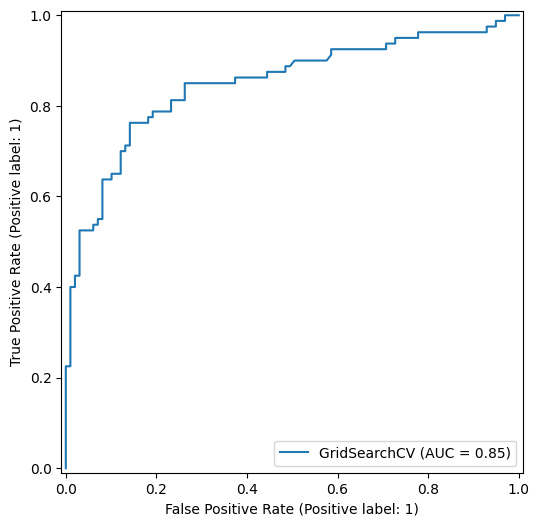

In [133]:
RocCurveDisplay.from_estimator(ada_grid, X_test, y_test);

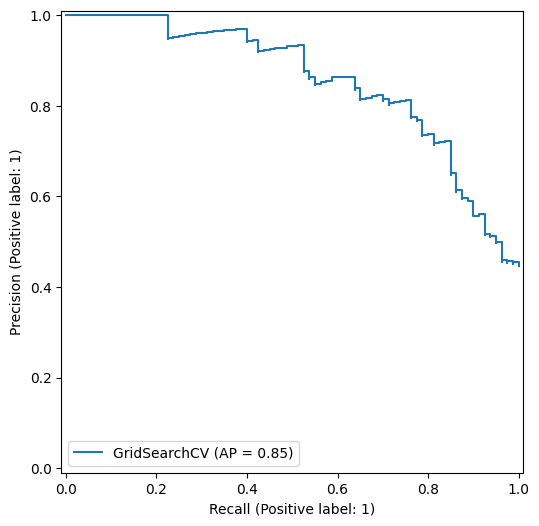

In [135]:
PrecisionRecallDisplay.from_estimator(ada_grid, X_test, y_test);

In [137]:
ada_auc = roc_auc_score(y_test, y_pred_test)
ada_auc

0.7843434343434343

In [143]:
y_pred_proba = ada_grid.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

ada_prc = auc(recall, precision)
ada_prc

0.8531483637369217

## <font color='slateblue'> <b>Gradient Boost</b><font color='black'>

In [147]:
param_grid = {"n_estimators":[50, 100, 150, 200, 250, 300],
              "subsample":[0.5, 1],
              "max_features" : [None, 2, 3, 4, 5],
              "learning_rate": [0.001, 0.01, 0.1, 0.5, 1],
              'max_depth':[3,4,5]
             }

grb_model = GradientBoostingClassifier()
grb_grid = GridSearchCV(grb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, cv=10,
                        return_train_score=True)

grb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 4, 5],
                         'max_features': [None, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300],
                         'subsample': [0.5, 1]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [149]:
grb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 3,
 'n_estimators': 250,
 'subsample': 1}

In [151]:
y_pred_test = grb_grid.predict(X_test)
y_pred_train = grb_grid.predict(X_train)

In [153]:
grb_accuracy_test = accuracy_score(y_test, y_pred_test)
grb_accuracy_train = accuracy_score(y_train, y_pred_train)

grb_f1_test = f1_score(y_test, y_pred_test)
grb_f1_train = f1_score(y_train, y_pred_train)

grb_accuracy_test, grb_accuracy_train, grb_f1_test, grb_f1_train

(0.8212290502793296,
 0.8426966292134831,
 0.7681159420289855,
 0.7606837606837606)

In [155]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[94  5]
 [27 53]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[422  28]
 [ 84 178]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.78      0.95      0.85        99
           1       0.91      0.66      0.77        80

    accuracy                           0.82       179
   macro avg       0.85      0.81      0.81       179
weighted avg       0.84      0.82      0.82       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       450
           1       0.86      0.68      0.76       262

    accuracy                           0.84       712
   macro avg       0.85      0.81      0.82       712
weighted avg       0.85      0.84      0.84       712



### <font color='lightskyblue'> <b>Feature Importance</b><font color='black'>

In [157]:
grb_model = GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth= 3,
 n_estimators= 250,
 max_features= 3,
 subsample= 1,
 random_state=101)

grb_model.fit(X_train, y_train)

grb_model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=grb_model.feature_importances_, columns=['grad_importance'])
grb_fi = feats.sort_values("grad_importance", ascending=False)
grb_fi

,grad_importance
Sex,0.524900
Pclass,0.167914
Age,0.116962
Fare,0.115676
SibSp,0.044512
Embarked,0.017891
Parch,0.012145


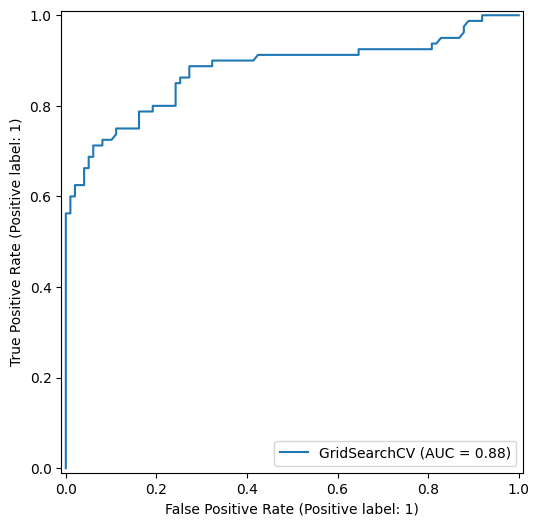

In [159]:
RocCurveDisplay.from_estimator(grb_grid, X_test, y_test);

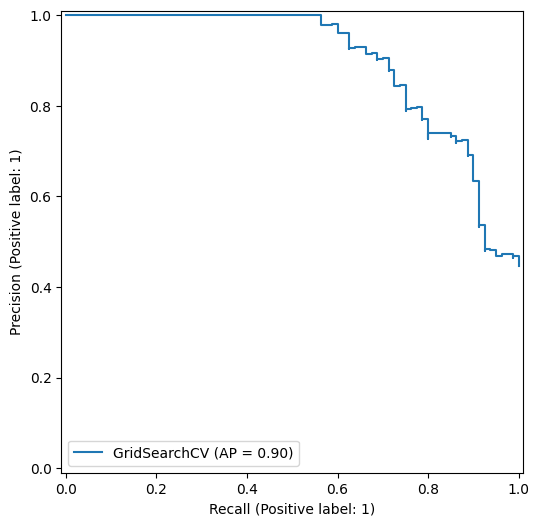

In [161]:
PrecisionRecallDisplay.from_estimator(grb_grid, X_test, y_test);

In [163]:
grb_auc = roc_auc_score(y_test, y_pred_test)
grb_auc

0.8059974747474749

In [165]:
y_pred_proba = grb_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

grb_prc = auc(recall, precision)
grb_prc

0.8976455415471841

## <font color='slateblue'> <b>XGBoost</b><font color='black'>

In [168]:
param_grid = {"booster":['dart','gbtree'],
              "eta":[0.05, 0.01, 0.1, 0.2],
              "n_estimators":[25, 50, 75, 100, 200],
              'max_depth':[2, 3, 5],
              "learning_rate": [0.05, 0.1],
              "subsample":[0.5, 0.8, 1],
              "colsample_bytree":[0.5, 0.7, 1],
              'reg_alpha':[0, 1]
             }

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, cv=10,
                        return_train_score=True)

xgb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 4320 candidates, totalling 43200 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['dart', 'gbtree'],
                         'colsample_bytree': [0.5, 0.7, 1],
                         'eta': [0.05, 0.01, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1], 'max_depth': [2, 3, 5],
                         'n_estimators': [25, 50, 75, 100, 200],
                         'reg_alpha': [0, 1], 'subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [175]:
xgb_grid.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 1,
 'eta': 0.05,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 25,
 'reg_alpha': 0,
 'subsample': 0.8}

In [177]:
y_pred_test = xgb_grid.predict(X_test)
y_pred_train = xgb_grid.predict(X_train)

In [179]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test)
xgb_f1_train = f1_score(y_train, y_pred_train)

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.8212290502793296, 0.8735955056179775, 0.7647058823529411, 0.809322033898305)

In [181]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[95  4]
 [28 52]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[431  19]
 [ 71 191]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.77      0.96      0.86        99
           1       0.93      0.65      0.76        80

    accuracy                           0.82       179
   macro avg       0.85      0.80      0.81       179
weighted avg       0.84      0.82      0.82       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       450
           1       0.91      0.73      0.81       262

    accuracy                           0.87       712
   macro avg       0.88      0.84      0.86       712
weighted avg       0.88      0.87      0.87       712



### <font color='lightskyblue'> <b>Feature Importance</b><font color='black'>

In [183]:
model = XGBClassifier(booster='gbtree',
 eta=0.05,
 colsample_bytree= 1,
 learning_rate= 0.1,
 max_depth= 5,
 n_estimators= 25,
 reg_alpha= 0,
 subsample= 0.8,
 random_state=101)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_fi = feats.sort_values("xgb_importance", ascending=False)
xgb_fi

,xgb_importance
Sex,0.634283
Pclass,0.160059
SibSp,0.062190
Embarked,0.049277
Age,0.036909
Fare,0.034982
Parch,0.022301


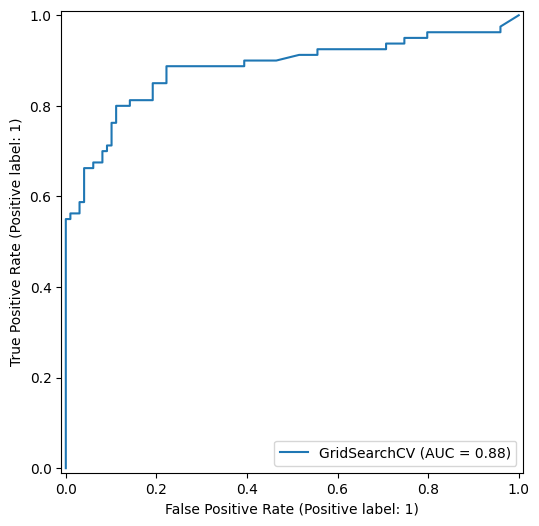

In [185]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

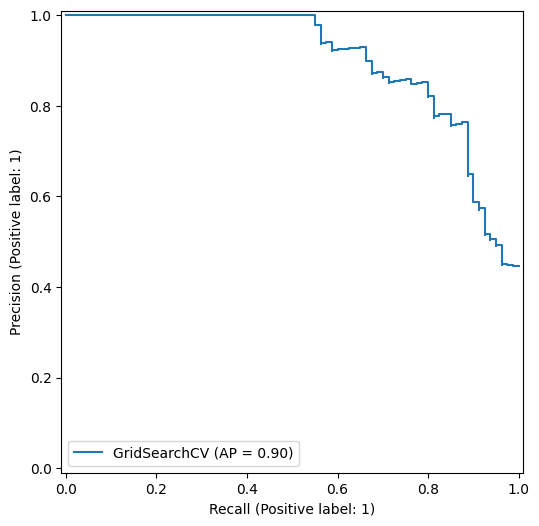

In [187]:
PrecisionRecallDisplay.from_estimator(xgb_grid, X_test, y_test);

In [189]:
xgb_auc = roc_auc_score(y_test, y_pred_test)
xgb_auc

0.8047979797979797

In [191]:
y_pred_proba = xgb_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

xgb_prc = auc(recall, precision)
xgb_prc

0.9000114889764409

## <font color='slateblue'> <b>Comparing The Feature Importance</b><font color='black'>

In [193]:
pd.concat([ada_fi, grb_fi, xgb_fi], axis=1)

,ada_importance,grad_importance,xgb_importance
Fare,0.690000,0.115676,0.034982
Age,0.223333,0.116962,0.036909
Embarked,0.026667,0.017891,0.049277
Sex,0.020000,0.524900,0.634283
SibSp,0.016667,0.044512,0.062190
Parch,0.016667,0.012145,0.022301
Pclass,0.006667,0.167914,0.160059


<a id='compare-models'></a>
# <font color='cornflowerblue'> <b>Comparing The Models</b><font color='black'>

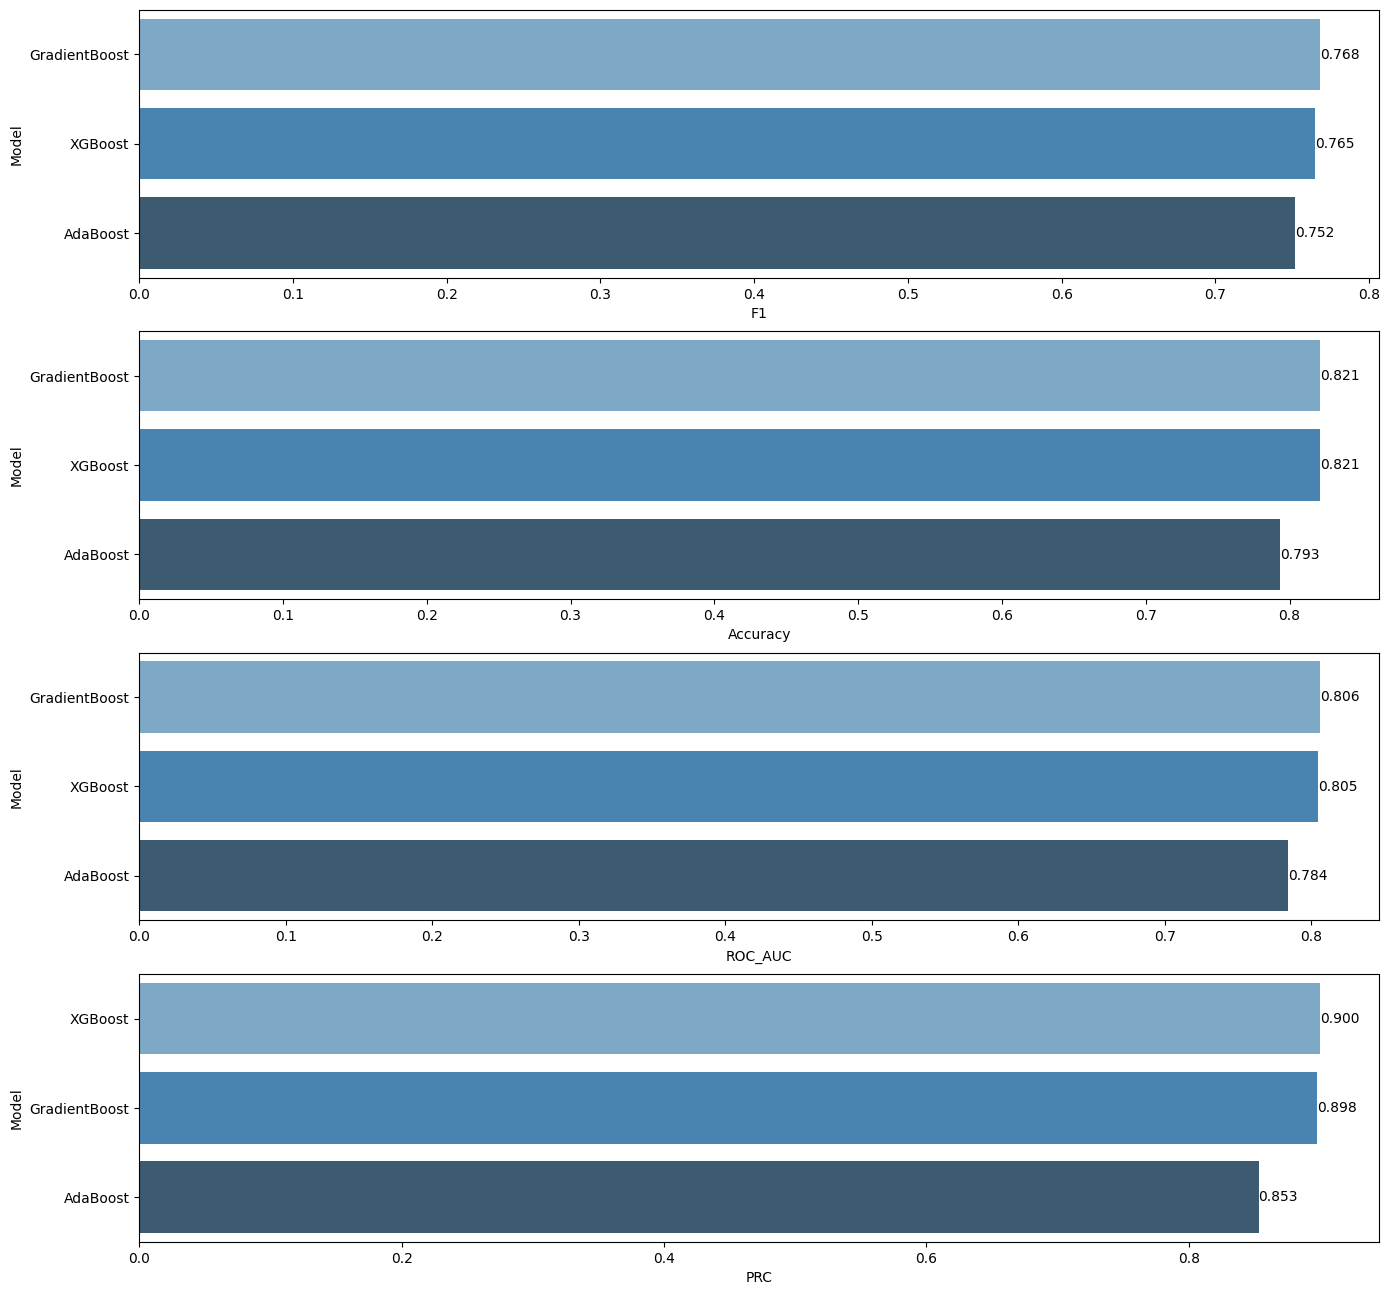

In [195]:
compare = pd.DataFrame({"Model": ["AdaBoost", "GradientBoost", "XGBoost"],
                        "Accuracy": [ada_accuracy_test, grb_accuracy_test, xgb_accuracy_test],
                        "F1": [ada_f1_test, grb_f1_test, xgb_f1_test],
                        "ROC_AUC": [ada_auc, grb_auc, xgb_auc],
                        "PRC": [ada_prc, grb_prc, xgb_prc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(16,16))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="PRC", ascending=False)
ax=sns.barplot(x="PRC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

<a id='final-model'></a>
# <font color='cornflowerblue'> <b>Final Model & Prediction</b><font color='black'>

**The XGBoost model was chosen as the final model.** Predictions were made based on this model and the obtained values ​​were converted into a csv file in the desired format.

In [201]:
# let's make predictions with test data
pred_validation = xgb_grid.predict(test_df)

In [203]:
# Saving predictions according to Kaggle competition format
submit_df = pd.DataFrame({'PassengerId': test_ids, 'Survived': pred_validation})
submit_df['Survived']  = submit_df['Survived'].astype(int)

In [205]:
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [207]:
submit_df.to_csv("titanic_submit.csv", index=False)  

<a id='conclusion'></a>
# <font color='cornflowerblue'> <b>Conclusion</b><font color='black'>

Throughout the analysis and modeling process, XGBoost, GradientBoost, and AdaBoost algorithms were compared. The performance of the models was evaluated using metrics such as F1 score, accuracy, ROC_AUC, and PRC. The results indicated that the XGBoost algorithm provided a more balanced performance. For achieving better results in Kaggle competitions, hyperparameter optimization and more advanced feature engineering are recommended.

<p style="background-color:cornflowerblue;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>